# Competitive Pricing SD Model in Jupyter using Python

In this notebook, we build the Competitve Pricing stock and flow diagram (s. [Competitve Pricing Notebook](competitive_pricing_dynamics.ipynb)) using Python . In other words, we create the model with the SD DSL (s. [System Dynamics using SD DSL](https://bptk.transentis-labs.com/en/latest/docs/in_depth/in_depth_sd_dsl/in_depth_sd_dsl.html)) which is part of the BPTK-Py framework. It copies the behavior of the model in Stella Architect.

We first import the BPTK-Py library and SD function library into our notebook. The SD function library contains functions and operators which we require to determine our model equations.

In [8]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

We create our model using the `Model` class as follows:

In [9]:
model = Model(starttime=0.0,stoptime=2.0,dt=0.25,name='CompetitvePricing')

The stock and flow model consists of six parts:

- Production and inventory
- Demand formation
- Price adjustment
- Profit
- Perceived Inventory
- Expected Profitability

The following sections explain each part in more detail. Furthermore, they demonstrate the composition of stocks, flows, converters and constants. 

## Creating model

### 1) Production and Inventory

<div align="center"><img src="images/competitive_pricing_model_1.svg" width="90%"></div>

**Stocks:** production capacity, production, inventory


In [10]:
productionCapacity = model.stock("productionCapacity")
production = model.stock("production")
inventory = model.stock("inventory")

**Flows:** production start rate, production rate, consumption rate

In [11]:
productionStartRate = model.flow("productionStartRate")
productionRate = model.flow("productionRate")
consumptionRate = model.flow("consumptionRate")

**Converters:** effect of profitability on capacity utilization,capacity utilization, inventory coverage

In [12]:
capacityUtilization = model.converter("capacityUtilization")
effectOfProfitabilityOnCapacityUtilzation = model.converter("effectOfProfitabilityOnCapacityUtilzation")
inventoryCoverage = model.converter("inventoryCoverage")

**Constants:** production time

*Normalized expected profitability and demand are not constants. They are results of other parts.*

In [13]:
productionTime = model.constant("productionTime")

### 2) Demand formation

<div align="center"><img src="images/competitive_pricing_model_4.svg" width="90%"></div>

*This model does not have any stocks or flows.*

**Converters:** relative value of product, effect of relative value on demand, reference demand, demand

In [14]:
relativeValueOfProduct = model.converter("relativeValueOfProduct")
effectOfRelativeValueOnDemand = model.converter("effectOfRelativeValueOnDemand")
referenceDemand = model.converter("referenceDemand")
demand = model.converter("demand")

**Constants:** price of substitutes, size of shock, market shock on

*Price is not a constant. It is a result of another part.*

In [15]:
sizeOfShock = model.constant("sizeOfShock")
marketShockOn = model.constant("marketShockOn")
priceOfSubstitutes = model.constant("priceOfSubstitutes")

### 3) Price Adjustment

This section contains two models. The first model determines the minimum price. The second describes the formation of the product's price.

<div align="center"><img src="images/competitive_pricing_model_7.svg" width="90%"></div>

*This model does not have any stocks, flows or constants. Unit variable cost and unit capacity cost are results of other parts.*

**Converters:** capacity cost per unit, minimum price

In [16]:
minimumPrice = model.converter("minimumPrice")
capacityCostPerUnit = model.converter("capacityCostPerUnit")

<div align="center"><img src="images/competitive_pricing_model_2.svg" width="90%"></div>

**Stocks:** expected price

In [17]:
expectedPrice = model.stock("expectedPrice")

**Flows:** change in expected price

In [18]:
changeInExpectedPrice = model.flow("changeInExpectedPrice")

**Converters:** indicated price, effect of inventory coverage on price, price

In [19]:
indicatedPrice = model.converter("indicatedPrice")
effectOfInventoryCoverageOnPrice = model.converter("effectOfInventoryCoverageOnPrice")
price = model.converter("price")

**Constants:** 

*Minimum price and normalized inventory coverage are not constants. Minimum price is a result of the previous model and normalized inventory coverage is a result of another part.*

In [20]:
priceAdjustmentTime = model.constant("priceAdjustmentTime")

### 4) Profit

<div align="center"><img src="images/competitive_pricing_model_6.svg" width="90%"></div>

*This model has no stocks and flows. Production capacity is not a stock of this part. It is a result of the "Production and Inventory" part from the beginning.*

**Converters:** capacity cost, variable cost, cost, revenue, profit

In [21]:
capacityCost = model.converter("capacityCost")
variableCost = model.converter("variableCost")
cost = model.converter("cost")
revenue = model.converter("revenue")
profit = model.converter("profit")

**Constants:** unit capacity cost, unit variable cost

*Production rate, price and consumption rate are not constants of this model. They are results of other parts. Production rate and consumption rate are converters of the "Production and Inventory" model. Price is a converter of the "Price Adjustment" part.*

In [22]:
unitCapacityCost = model.constant("unitCapacityCost")
unitVariableCost = model.constant("unitVariableCost")

### 5) Perceived Inventory

![Commodity Pricing Dynamics](images/competitive_pricing_model_3.svg)

**Stocks:** perceived inventory coverage

In [23]:
perceivedInventoryCoverage = model.stock("perceivedInventoryCoverage")

**Flows:** change in perceived inventory coverage

In [24]:
changeInPerceivedInventoryCoverage = model.flow("changeInPerceivedInventoryCoverage")

**Converters:** normalized perceived inventory coverage

In [25]:
normalizedPerceivedInventoryCoverage = model.converter("normalizedPerceivedInventoryCoverage")

**Constants:** inventory coverage perception time, reference inventory coverage

*Inventory coverage is not a constant of this part. It is a converter and a result of the "Production and Inventory" model.*

In [26]:
referenceInventoryCoverage = model.constant("referenceInventoryCoverage")
inventoryCoveragePerceptionTime = model.constant("inventoryCoveragePerceptionTime")

### 6) Expected Profitability

<div align="center"><img src="images/competitive_pricing_model_5.svg" width="90%"></div>

**Stocks:** expected profitability

In [71]:
expectedProfitability = model.stock("expectedProfitability")

**Flows:** change in expected profitability

In [72]:
changeInExpectedProfitability = model.flow("changeInExpectedProfitability")

**Converters:** normalized expected profitability

In [73]:
normalizedExpectedProfitability = model.converter("normalizedExpectedProfitability")

**Constants:** profit adjustment time, reference expected profitability

*Profit is not a constant of this part. It is a result of the "Profit" model.*

In [74]:
referenceExpectedProfitability = model.constant("referenceExpectedProfitability")
profitAdjustmentTime = model.constant("profitAdjustmentTime")

## Initializing the stocks

In [75]:
productionCapacity.initial_value = 200.0
production.initial_value = 300.0
inventory.initial_value = 300.0
expectedPrice.initial_value = 3.0
perceivedInventoryCoverage.initial_value = 3.0
expectedProfitability.initial_value = 100.0

## Defining Equations

### Production and Inventory

In [76]:
productionTime.equation = 3.0

In [77]:
effectOfProfitabilityOnCapacityUtilzation.equation = sd.lookup(normalizedExpectedProfitability,"effectOfProfitabilityOnCapacityUtilzation")
capacityUtilization.equation = effectOfProfitabilityOnCapacityUtilzation
productionStartRate.equation = capacityUtilization*productionCapacity
productionRate.equation = sd.min(production, sd.delay(model, productionStartRate, productionTime, 100.0))
consumptionRate.equation = sd.min(inventory,demand)
inventoryCoverage.equation = inventory/consumptionRate

The stocks production and inventory have inflows and outflows.

In [78]:
production.equation = productionStartRate - productionRate
inventory.equation = productionRate - consumptionRate

We define the effect of profitability on capacity utilzation in our model using a non-linear relationship (depending on the normalized expected profitability). We capture this relationship in a lookup table that we store in the `points` property of the model (using a Python list):

In [79]:
model.points["effectOfProfitabilityOnCapacityUtilzation"] = [
    [0.0,0.324],
    [0.167,0.33],
    [0.333,0.372],
    [0.5,0.394],
    [0.667,0.41],
    [0.833,0.42],
    [1.0,0.5],
    [1.167,0.745],
    [1.333,0.80075],
    [1.5,0.8565],
    [1.667,0.91225],
    [1.833,0.968],
    [2.0,0.968]
]

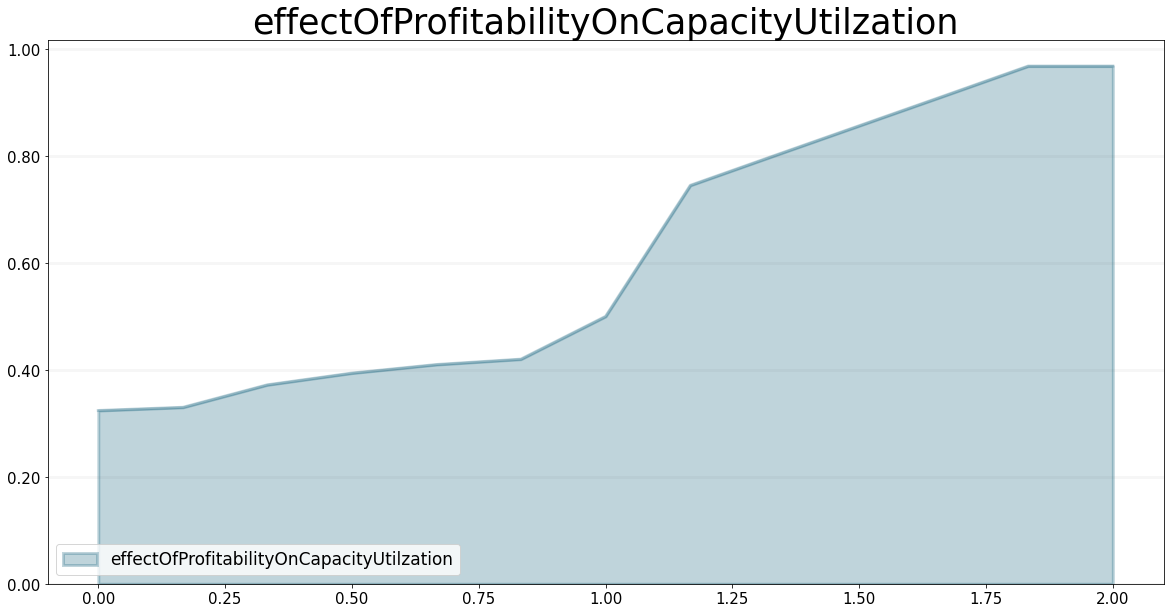

In [80]:
model.plot_lookup("effectOfProfitabilityOnCapacityUtilzation")

### Demand Formation

In [81]:
sizeOfShock.equation = 50.0
marketShockOn.equation = 0.0
priceOfSubstitutes.equation = 3.0

In [82]:
relativeValueOfProduct.equation = priceOfSubstitutes/price
effectOfRelativeValueOnDemand.equation = sd.lookup(relativeValueOfProduct,"effectOfRelativeValueOnDemand")
referenceDemand.equation = 100+marketShockOn*sd.step(sizeOfShock,10.0)
demand.equation = effectOfRelativeValueOnDemand*referenceDemand

In [83]:
model.points["effectOfRelativeValueOnDemand"] = [
    [0.0,0.17],
    [0.167,0.191],
    [0.333,0.213],
    [0.5,0.277],
    [0.667,0.351],
    [0.833,0.479],
    [1.0,1.0],
    [1.167,1.362],
    [1.333,1.479],
    [1.5,1.574],
    [1.667,1.638],
    [1.833,1.66],
    [2.0,1.66]
]

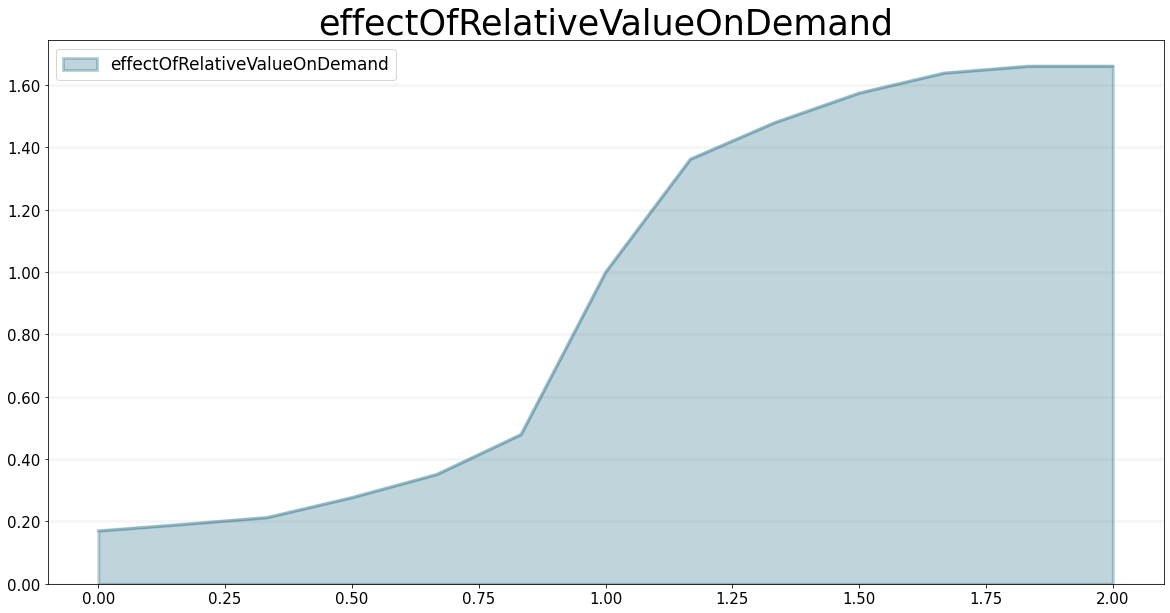

In [84]:
model.plot_lookup("effectOfRelativeValueOnDemand")

### Price Adjustment

In [85]:
priceAdjustmentTime.equation = 3.0

In [86]:
capacityCostPerUnit.equation = capacityCost/productionRate
minimumPrice.equation = unitVariableCost+capacityCostPerUnit
effectOfInventoryCoverageOnPrice.equation = sd.lookup(normalizedPerceivedInventoryCoverage,"effectOfInventoryCoverageOnPrice")
price.equation = expectedPrice/effectOfInventoryCoverageOnPrice
indicatedPrice.equation = sd.max(price, minimumPrice)
changeInExpectedPrice.equation = (indicatedPrice-expectedPrice)/priceAdjustmentTime

In [87]:
model.points["effectOfInventoryCoverageOnPrice"] = [
    [0.0,1.404],
    [0.167,1.415],
    [0.333,1.404],
    [0.5,1.372],
    [0.667,1.351],
    [0.833,1.277],
    [1.0,1.0],
    [1.167,0.787],
    [1.333,0.550],
    [1.5,0.4],
    [1.667,0.34],
    [1.833,0.298],
    [2.0,0.298]
]

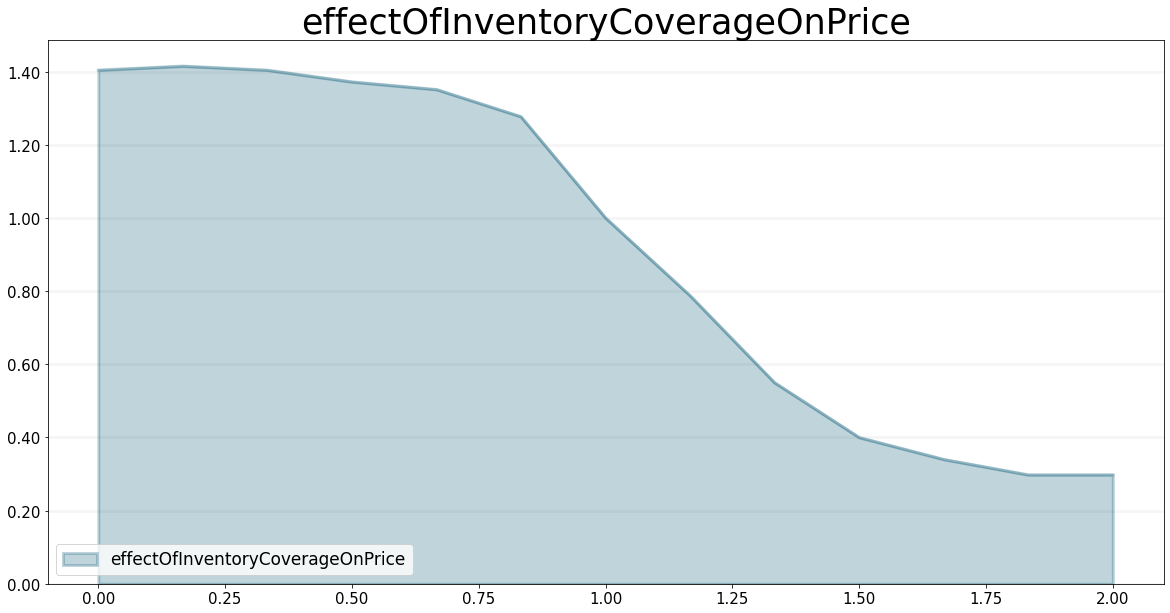

In [88]:
model.plot_lookup("effectOfInventoryCoverageOnPrice")

### Profit

In [89]:
unitCapacityCost.equation = 0.5
unitVariableCost.equation = 1.0

In [90]:
capacityCost.equation = unitCapacityCost*productionCapacity
variableCost.equation = unitVariableCost*productionRate
cost.equation = variableCost + capacityCost
revenue.equation = price * consumptionRate
profit.equation = revenue - cost

### Perceived Inventory Coverage

In [91]:
referenceInventoryCoverage.equation = 3.0
inventoryCoveragePerceptionTime.equation = 3.0

In [92]:
changeInPerceivedInventoryCoverage.equation = (inventoryCoverage-perceivedInventoryCoverage)/inventoryCoveragePerceptionTime
normalizedPerceivedInventoryCoverage.equation = perceivedInventoryCoverage/referenceInventoryCoverage
perceivedInventoryCoverage.equation = changeInPerceivedInventoryCoverage

### Expected Profitability

In [93]:
referenceExpectedProfitability.equation = 100.0
profitAdjustmentTime.equation = 12.0

In [94]:
changeInExpectedProfitability.equation = (profit-expectedProfitability)/profitAdjustmentTime
expectedProfitability.equation = changeInExpectedProfitability
normalizedExpectedProfitability.equation = expectedProfitability/referenceExpectedProfitability

## Scenario Management

We now use the scenario management of the BPTK-Py framework. We first import the library. 

In [95]:
import BPTK_Py
bptk = BPTK_Py.bptk()

Then we set up a scenario manager using a Python dictionary. The scenario manager identifies the baseline constants of the model:

In [96]:
scenario_manager = {
    "smCompetitivePricing":{
    
    "model": model,
    "base_constants": {
        "marketShockOn":0,
        "sizeOfShock":50

    },
   "base_points":{
            "effectOfProfitabilityOnCapacityUtilization":
            [
                [0.0, 0.324],
                [0.16666666666666666, 0.33],
                [0.3333333333333333, 0.372],
                [0.5, 0.394],
                [0.6666666666666666, 0.41],
                [0.8333333333333334, 0.42],
                [1.0, 0.5],
                [1.1666666666666667, 0.745],
                [1.3333333333333333, 0.80075],
                [1.5, 0.8565],
                [1.6666666666666667, 0.91225],
                [1.8333333333333333, 0.968],
                [2.0, 0.968]
            ],
            "effectOfRelativeValueOnDemand" :
               [
                   [0.0, 0.17],
                   [0.16666666666666666, 0.191],
                   [0.3333333333333333, 0.213],
                   [0.5, 0.277],
                   [0.6666666666666666, 0.351],
                   [0.8333333333333334, 0.479],
                   [1.0, 1.0],
                   [1.1666666666666667, 1.362],
                   [1.3333333333333333, 1.479],
                   [1.5, 1.574],
                   [1.6666666666666667, 1.638],
                   [1.8333333333333333, 1.66],
                   [2.0, 1.66]
               ] 
            ,
             "effectOfInventoryCoverageOnPrice" :  
                  [
                      [0.0, 1.404],
                      [0.16666666666666666, 1.415],
                      [0.3333333333333333, 1.404],
                      [0.5, 1.372],
                      [0.6666666666666666, 1.351],
                      [0.8333333333333334, 1.277],
                      [1.0, 1.0],
                      [1.1666666666666667, 0.787],
                      [1.3333333333333333, 0.55],
                      [1.5, 0.4],
                      [1.6666666666666667, 0.34],
                      [1.8333333333333333, 0.298],
                      [2.0, 0.298]
                  ] 
        },
        "scenarios":{
             "base":{
              }    
        }
        
 }
}

The next step is to register the scenario manager as follows:

In [97]:
bptk.register_scenario_manager(scenario_manager)

Once we have this, we can define and register more scenarios as follows:

In [98]:
bptk.register_scenarios(
    scenarios =
        {
             "marketShock":{
                "constants":{
                    "marketShockOn":1
                }
            },
              "availabilityLoop":{
               "constants":{
                    "marketShockOn":1
                },
               "points":{
                      "effectOfProfitabilityOnCapacityUtilization" : 
                       [
                           [0.0, 0.5],
                           [0.16666666666666666, 0.5],
                           [0.3333333333333333, 0.5],
                           [0.5, 0.5],
                           [0.6666666666666666, 0.5],
                           [0.8333333333333334, 0.5],
                           [1.0, 0.5],
                           [1.1666666666666667, 0.5],
                           [1.3333333333333333, 0.5],
                           [1.5, 0.5],
                           [1.6666666666666667, 0.5],
                           [1.8333333333333333, 0.5],
                           [2.0, 0.5]
                       ],
                    "effectOfRelativeValueOnDemand" :
                    [
                        [0.0, 1.0],
                        [0.16666666666666666,1.0],
                        [0.3333333333333333, 1.0],
                        [0.5, 1.0],
                        [0.6666666666666666, 1.0],
                        [0.8333333333333334, 1.0],
                        [1.0, 1.0],
                        [1.1666666666666667, 1.0],
                        [1.3333333333333333,1.0],
                        [1.5, 1.0],
                        [1.6666666666666667,1.0],
                        [1.8333333333333333, 1.0],
                        [2.0, 1.0]
                    ],
                     "effectOfInventoryCoverageOnPrice" :  
                        [
                            [0.0, 1.0],
                            [0.16666666666666666, 1.0],
                            [0.3333333333333333, 1.0],
                            [0.5, 1.0],
                            [0.6666666666666666, 1.0],
                            [0.8333333333333334, 1.0],
                            [1.0, 1.0],
                            [1.1666666666666667, 1.0],
                            [1.3333333333333333, 1.0],
                            [1.5, 1.0],
                            [1.6666666666666667, 1.0],
                            [1.8333333333333333, 1.0],
                            [2.0, 1.0]
                        ] 
               }
               
           },
           "capacityUtilizationLoop":{
               "constants":{
                    "marketShockOn":1
                },
               "points":{
                      
                    "effectOfRelativeValueOnDemand" :
                    [
                        [0.0, 1.0],
                        [0.16666666666666666,1.0],
                        [0.3333333333333333, 1.0],
                        [0.5, 1.0],
                        [0.6666666666666666, 1.0],
                        [0.8333333333333334, 1.0],
                        [1.0, 1.0],
                        [1.1666666666666667, 1.0],
                        [1.3333333333333333,1.0],
                        [1.5, 1.0],
                        [1.6666666666666667,1.0],
                        [1.8333333333333333, 1.0],
                        [2.0, 1.0]
                    ]
               
           }
           },
             "substitutionLoop":{
               "constants":{
                    "marketShockOn":1
                },
               "points":{
                      "effectOfProfitabilityOnCapacityUtilization" : 
                       [
                           [0.0, 0.5],
                           [0.16666666666666666, 0.5],
                           [0.3333333333333333, 0.5],
                           [0.5, 0.5],
                           [0.6666666666666666, 0.5],
                           [0.8333333333333334, 0.5],
                           [1.0, 0.5],
                           [1.1666666666666667, 0.5],
                           [1.3333333333333333, 0.5],
                           [1.5, 0.5],
                           [1.6666666666666667, 0.5],
                           [1.8333333333333333, 0.5],
                           [2.0, 0.5]
                       ]
               }
               
           }
        }
    ,
    scenario_manager="smCompetitivePricing")

Using the `plot_lookup` function on the bptk class, we can compare the lookup functions between different scenarios.

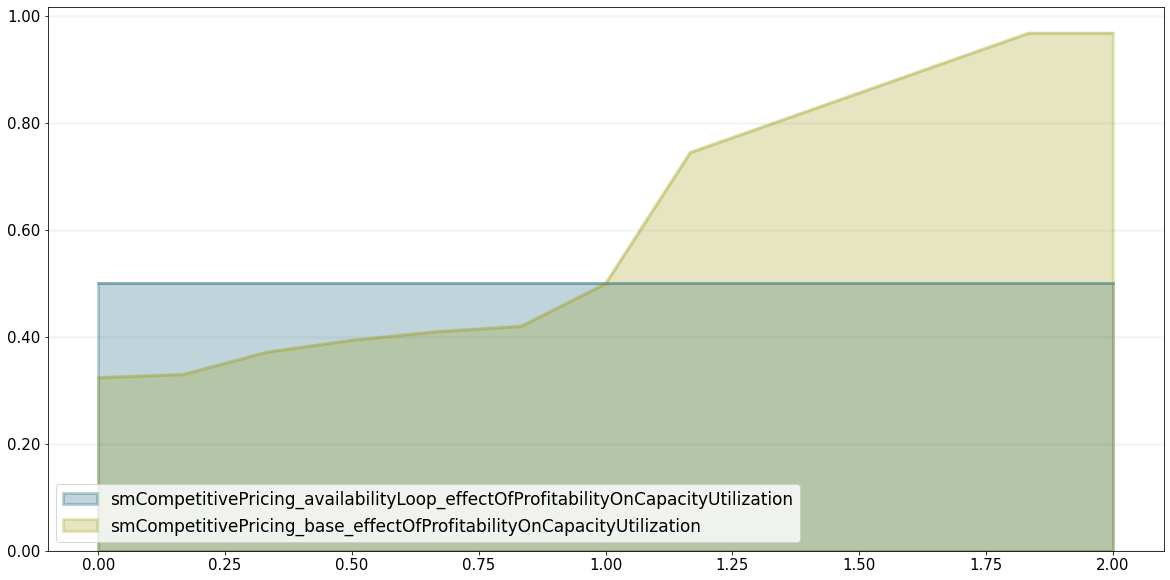

In [99]:
bptk.plot_lookup(
    scenario_managers=["smCompetitivePricing"],
    lookup_names=["effectOfProfitabilityOnCapacityUtilization"],
    scenarios=["base","availabilityLoop"])

## Scenario Experiments

### Base Case

Let's quickly run through the base case first, which starts the model in equilibrium.

The equilibrium price for our product is set at EUR 3. This is equal to both the indicated price  and the expected price. The minimum price (the amount we need to be profitable) is at EUR 1.5

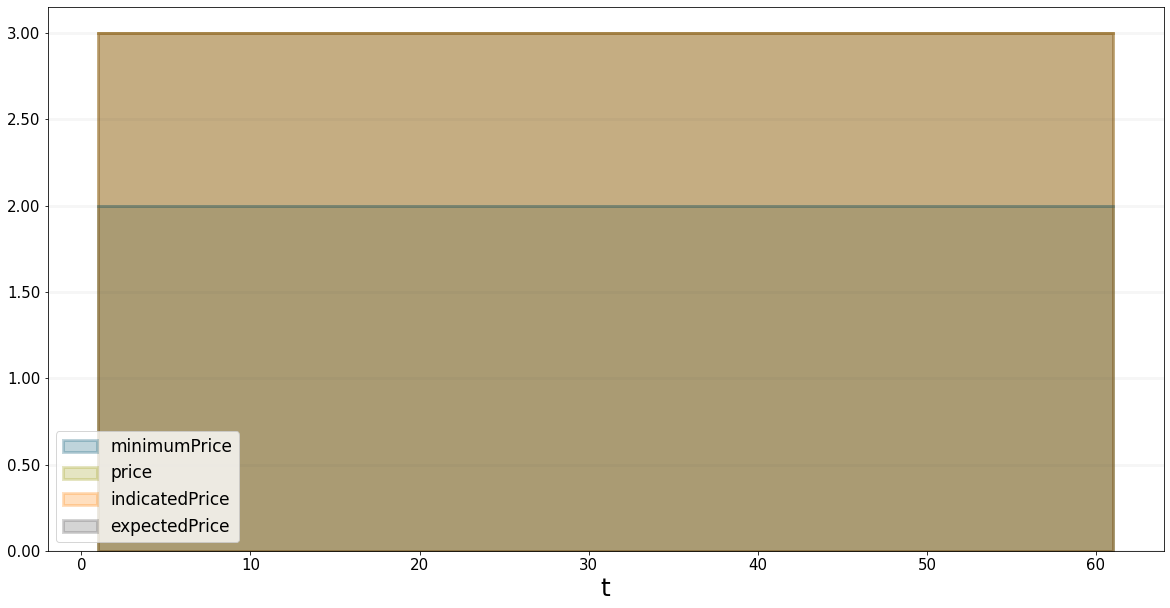

In [100]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["minimumPrice","price","indicatedPrice","expectedPrice"]
            )

Initially there is a reference demand of 100 units per month. Because the market is in equilibrium, the reference demand (i.e. the demand given the equilibrium price) equals the actual demand.

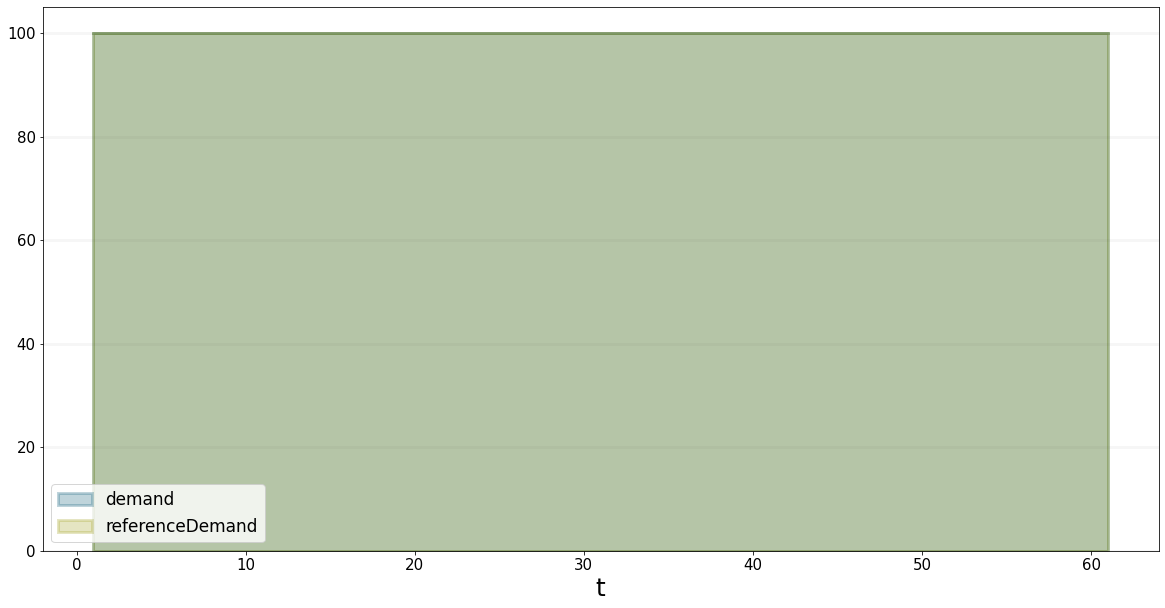

In [101]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["demand","referenceDemand"]
            )

Our production capacity is 200 units per month - but we only produce 100 units per month to avoid overstocking and are thus at a utilization of 50%. 300 units are "work in progress" within production.

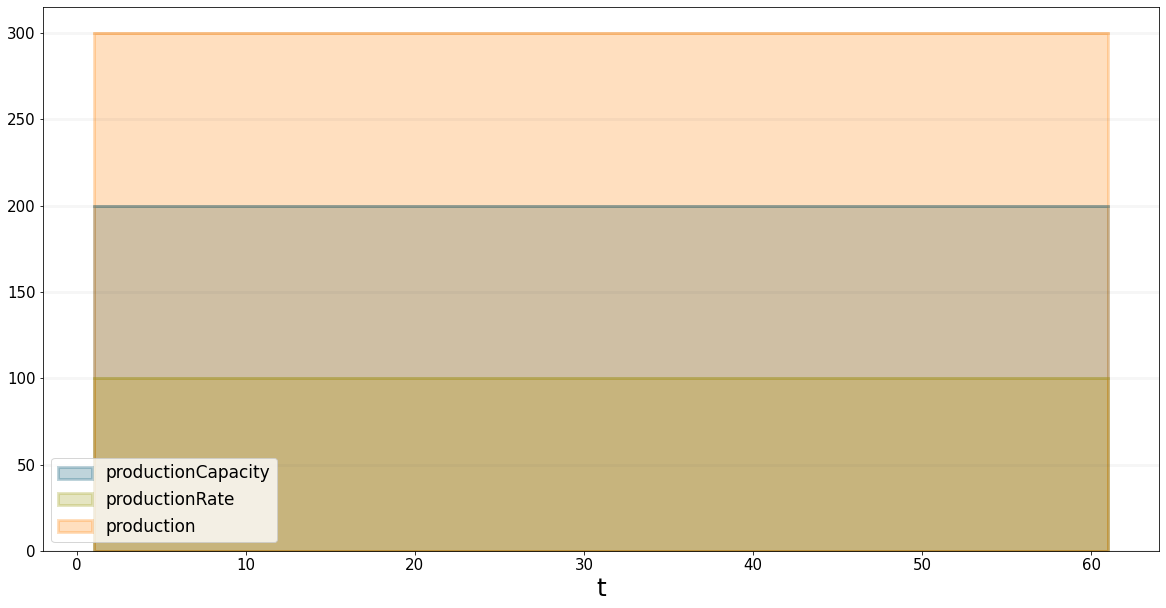

In [102]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["productionCapacity","productionRate","production"]
            )

Capacity utilization is thus at 50%.

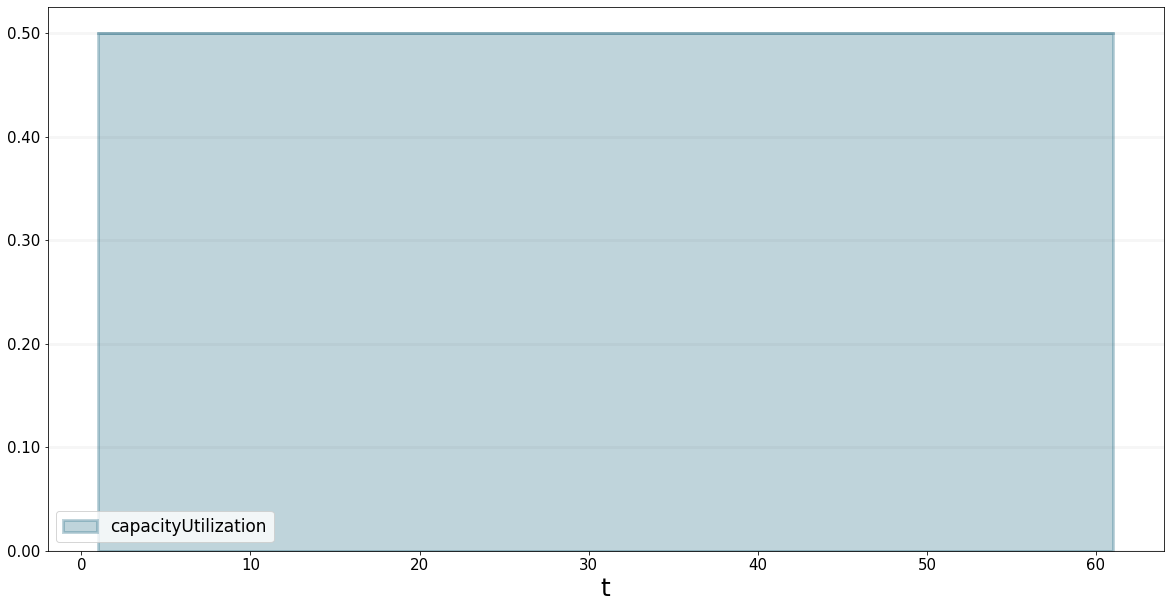

In [103]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["capacityUtilization"]
            )

The inventory is also at 300 and the consumption rate equals the demand, i.e. is at 100.

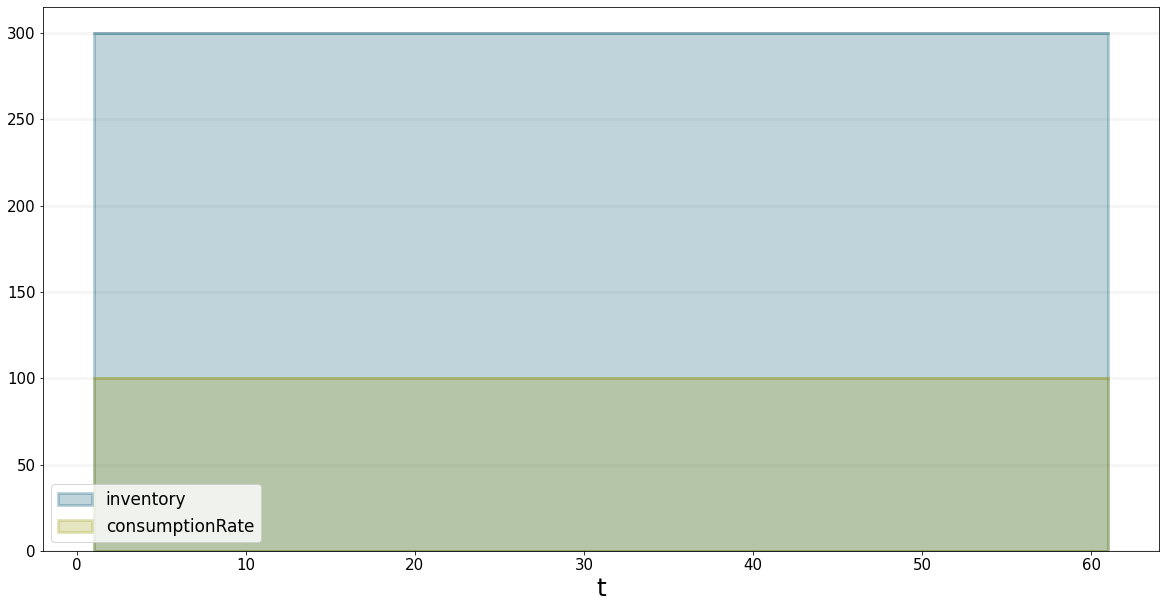

In [104]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["inventory","consumptionRate"]
            )

This leads to an inventory coverage of 3.

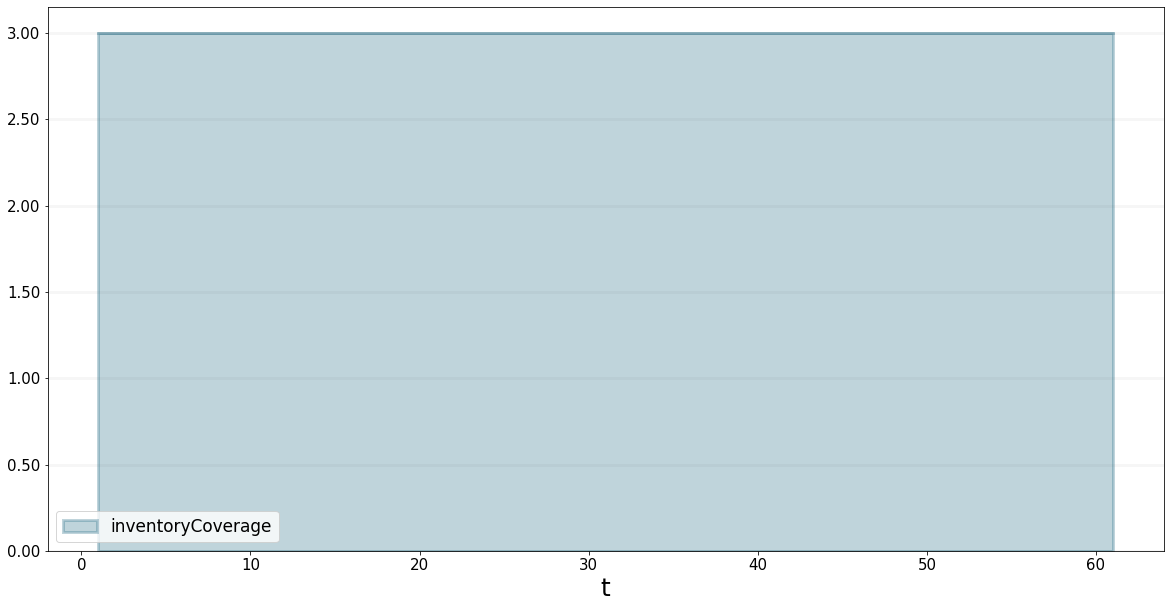

In [105]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"], 
            equations=["inventoryCoverage"]
            )

## Market Shock

Let's investigate what happens if there is a sudden increase in the underlying demand of 50% at timestep 10. Note that the increase in demand is _at the current level of pricing_.

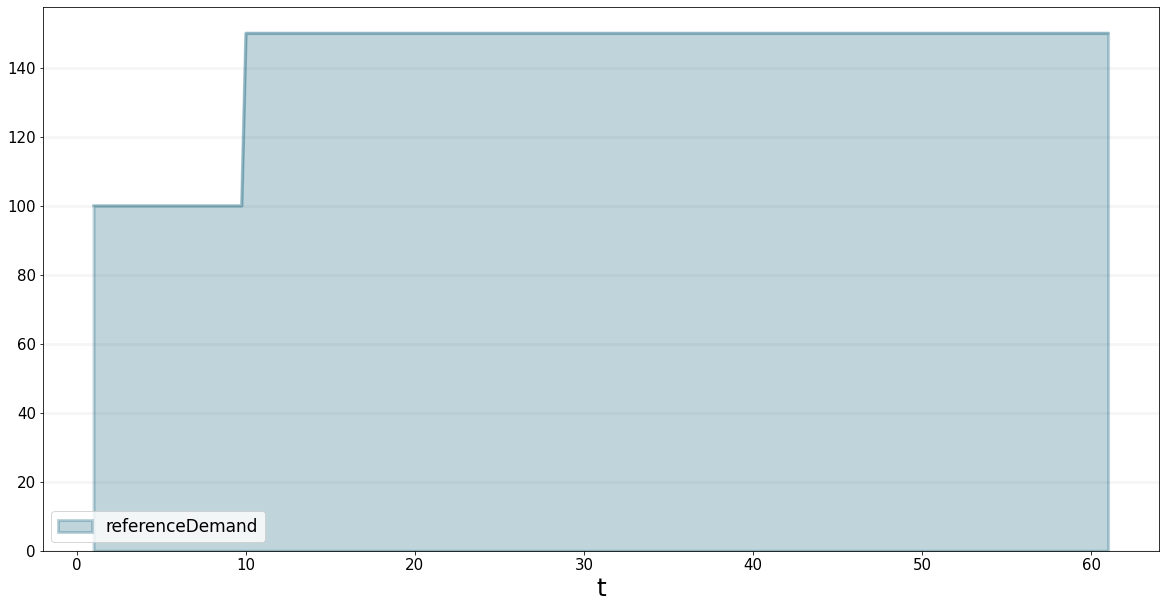

In [106]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=["referenceDemand"]
            )

The graph below shows how the actual demand and the inventory develops - as expected, there is an inital demand peak. But this causes the inventory to drop, which increases the price. The increase price leads to increased production, which then lowers the price and thus increases demand.

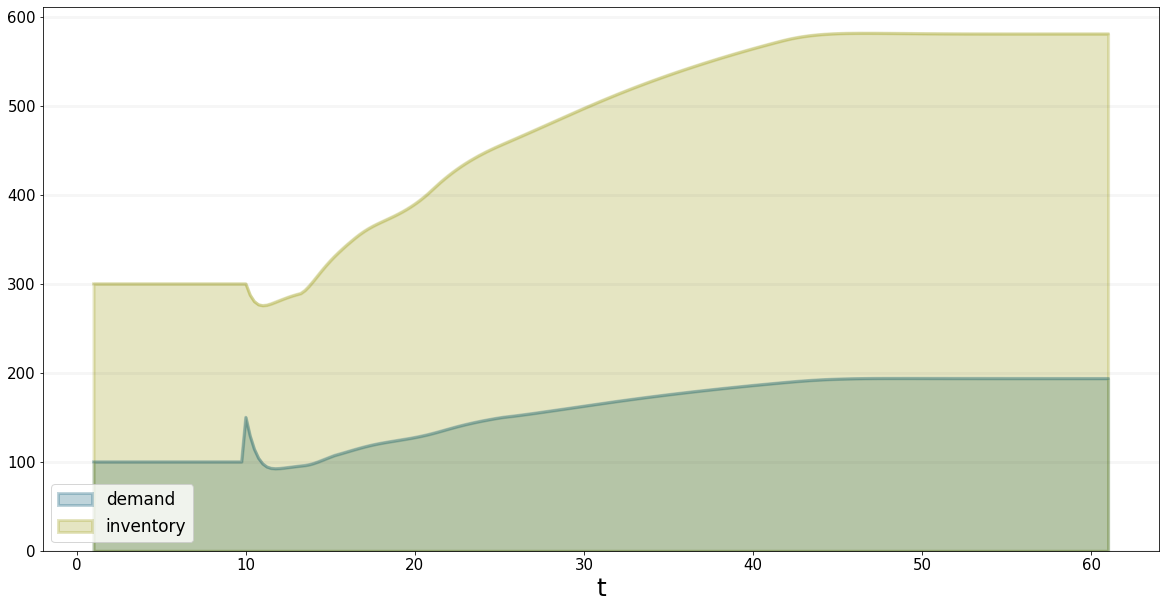

In [107]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=["demand", "inventory"]
            )

This is because the actual price affects the demand - if the price is higher then the reference price, demand drops, if the price is lower, demand increases compared to the reference demand.

The plot below shows how the dependency is quantified in this model using a non-linear function - the exact shape of this function will depend on your specific situation.

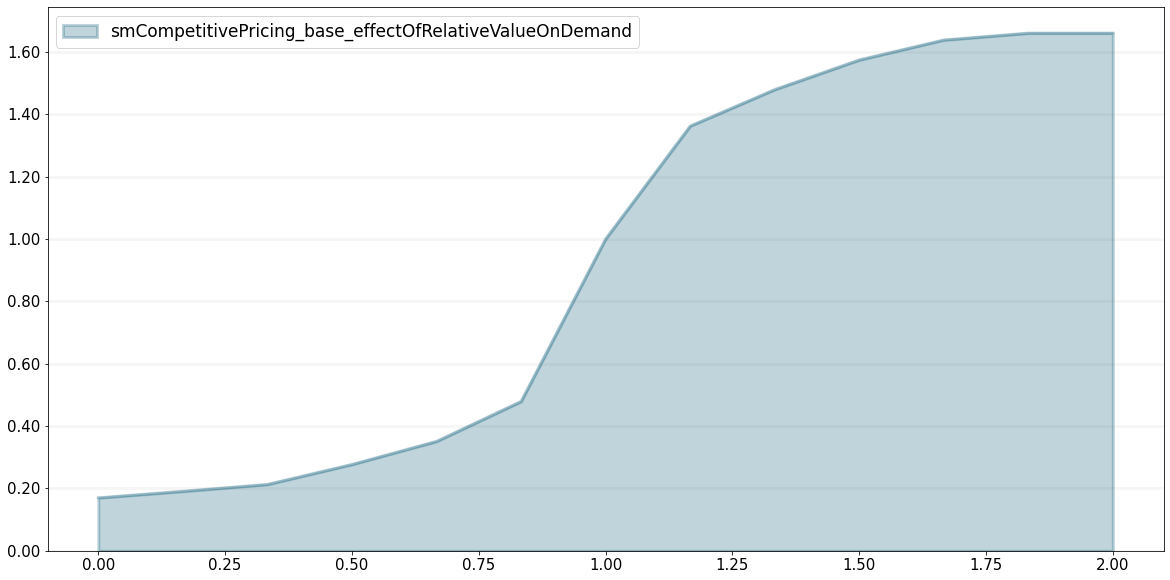

In [108]:
bptk.plot_lookup(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"],
            lookup_names=["effectOfRelativeValueOnDemand"]
)

We also assume that prices are sensitive to the availability of the product. If the product becomes scare (i.e. the inventory coverage falls), prices go up, and vice versa. The dependency is modelled using the following table function:

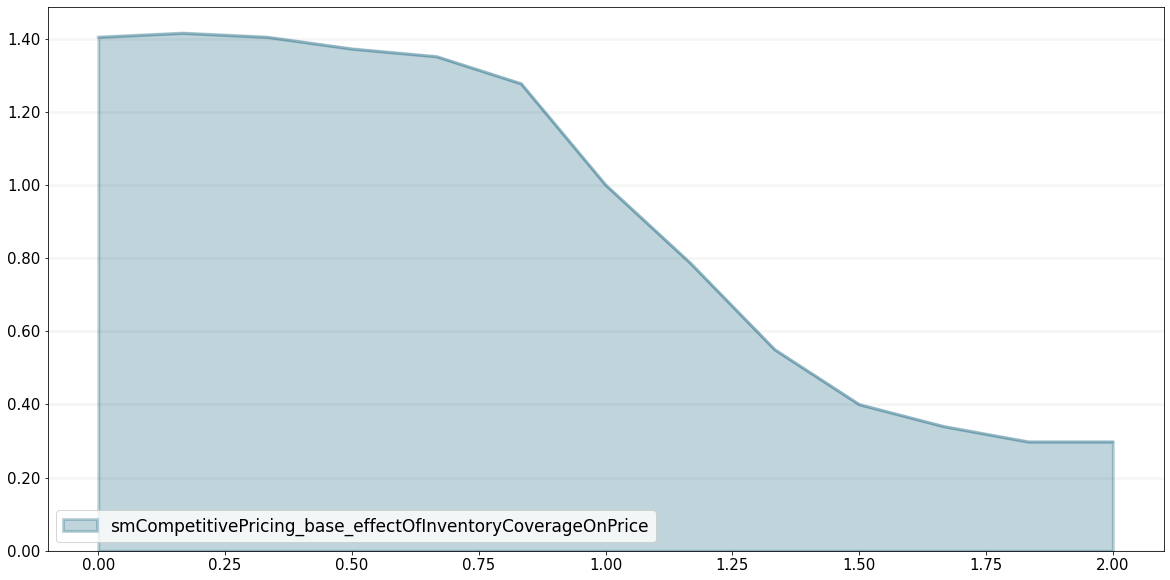

In [109]:
bptk.plot_lookup(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base"],
            lookup_names=["effectOfInventoryCoverageOnPrice"]
)

The production rate increases to a new, much higher level.

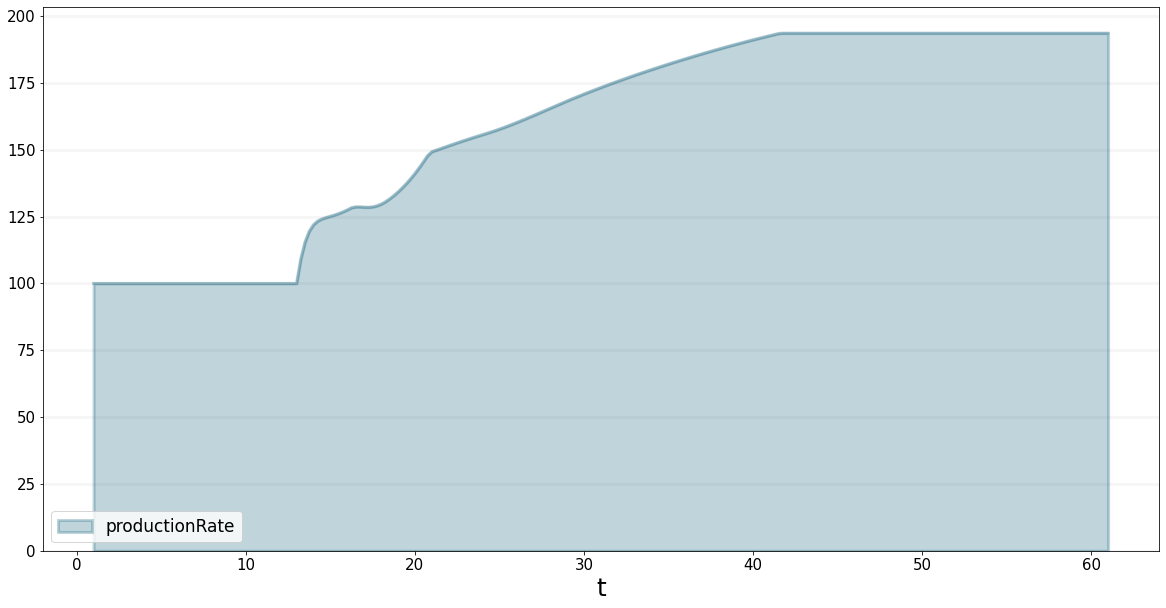

In [110]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=['productionRate']
            )

The price increases initially, because of the drop in inventory coverage. But the inventory coverage quickly recoveres due to increase production. Because inventory coverage influences the price, this leads to a price that is actually lower than the original price, but also to a demand that is higher than that indicated by the initial market shock.

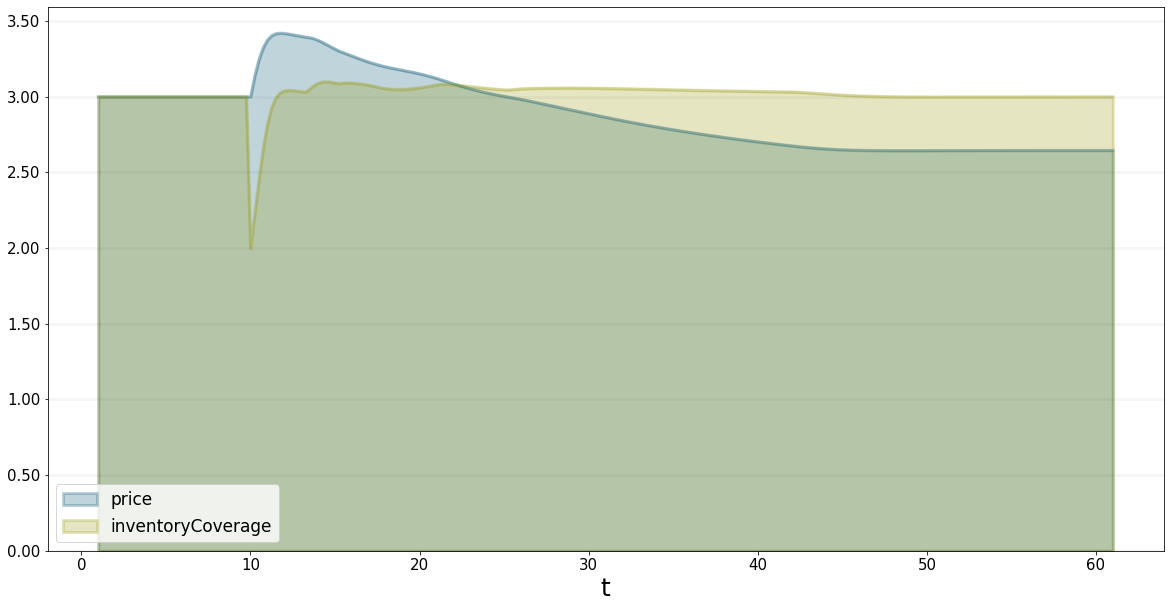

In [111]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["marketShock"], 
            equations=['price','inventoryCoverage']
            )

even though the overall demand incrase is only at around 75%, our profits more than double, as seen in the graph below.

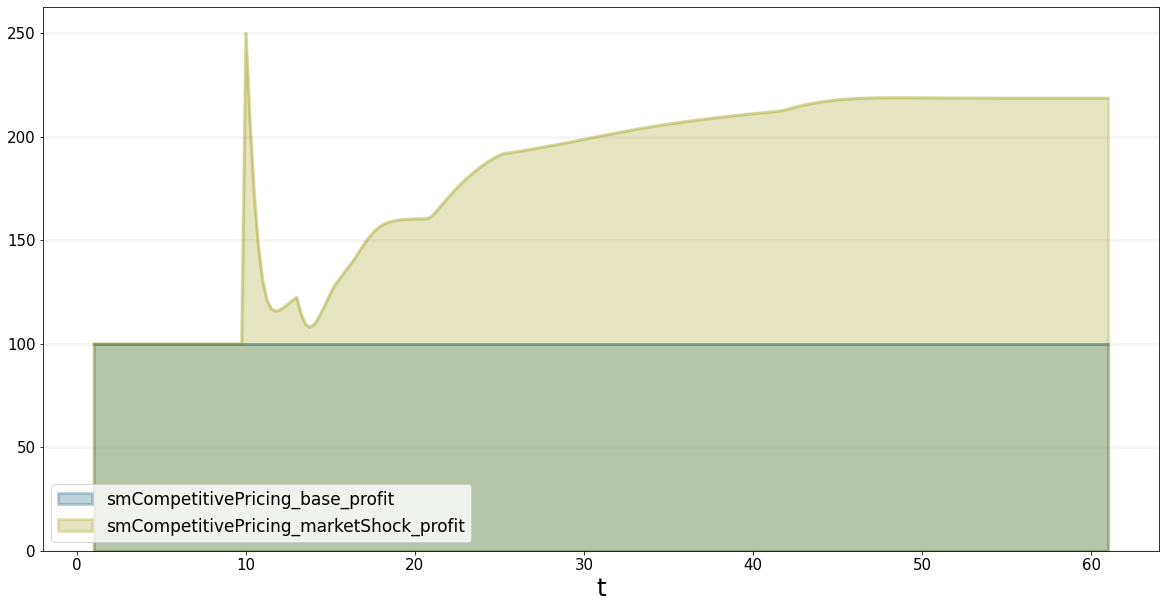

In [112]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base","marketShock"], 
            equations=['profit']
            )

This is because we are utilizing our production capacity better: we go from a utilization of 50% to a utilization above 90%, as seen in the graph below.

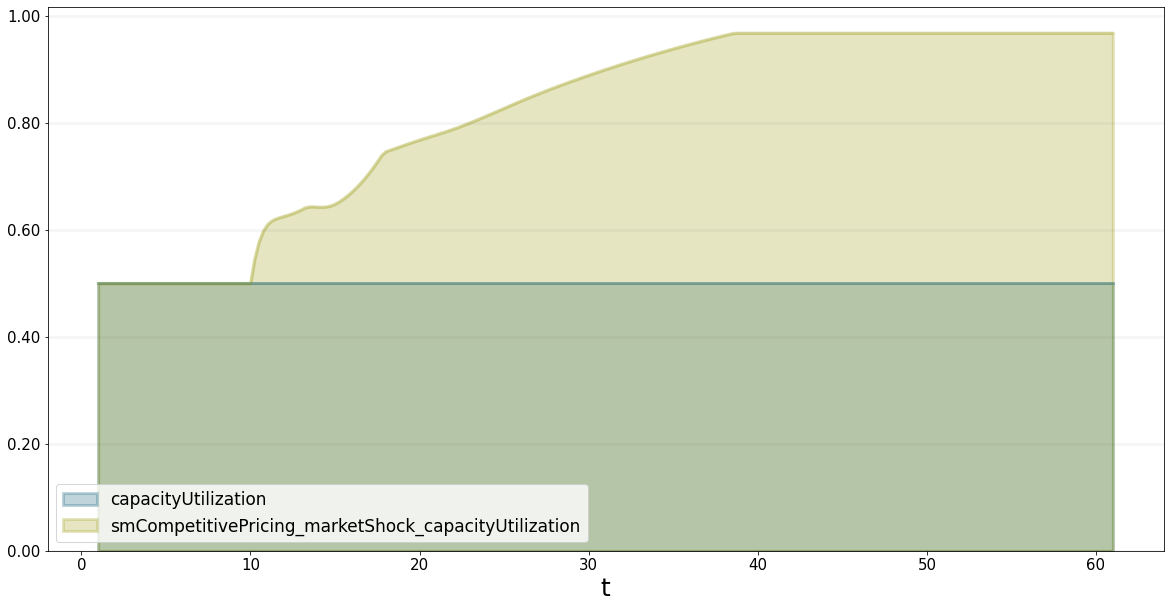

In [113]:
bptk.plot_scenarios(
            scenario_managers=["smCompetitivePricing"],
            scenarios=["base","marketShock"], 
            equations=['capacityUtilization']
            )

The figures above show that with the given shock of a 50% increase in underlying demand, we get close to our capacity limits.